In [31]:
import numpy as np

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
path = pd.read_csv('c:\P1\student_info.csv')

In [9]:
path.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [34]:
path.shape

(200, 2)

In [35]:
# Discover and visual data
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [36]:
 #get data numerical value information 
path.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0, 0.5, 'Student Marks')

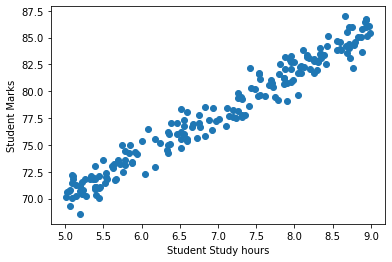

In [37]:
#visualized data
plt.scatter(x=path.study_hours, y=path.student_marks)
plt.xlabel("Student Study hours")
plt.ylabel("Student Marks")

In [14]:
# as above says as hours increses then students marks also increased.so we can have liner fasion 

# Prepare data for machine learning algorithem


In [38]:
#Cleaning Data
path.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [39]:
#Now count how many null values are there in our data
path.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [40]:
#best data : we have include value in 5 missing places so best is use mean 
path.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [41]:
#Now we have to include NAN value with mean

path1= path.fillna(path.mean())
path1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [42]:
path1.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [43]:
#Now we have split data into x and y { X (capital X) = matrix, small means = vector}
# study_hours -> independent variable and student marks = dependent variable
X = path.drop("student_marks", axis = "columns") 
y = path.drop ("study_hours", axis = "columns")

#now check what all values X and y has
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (200, 1)
Shape of y (200, 1)


In [44]:
# we have to split into train (70%)and test (30%)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=51) #random_state will take randomly value out of 200 students , we use 51 patterns
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (160, 1)
Shape of y_train (160, 1)
Shape of X_test (40, 1)
Shape of y_test (40, 1)


# Collect model and train it

In [45]:
# y=mx+c , as we have seen in scatter plot its showing liner line so we have to find a and c from eqution , we will get continuios value so we will use liner regression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()# LinearRegression class imported and its object also created
 
    #Now X and y using train model
lr.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
# meaning of above error is has data missing value
#So we have to use path2 and now reexcute it again


#Now we have split data into x and y { X (capital X) = matrix, small means = vector}
# study_hours -> independent variable and student marks = dependent variable
X1 = path1.drop("student_marks", axis = "columns") 
y1 = path1.drop ("study_hours", axis = "columns")
#now check what all values X and y has
print("Shape of X1", X1.shape)
print("Shape of y1", y1.shape)


from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, test_size=0.2, random_state=51) #random_state will take randomly value out of 200 students , we use 51 patterns
print("Shape of X1_train", X1_train.shape)
print("Shape of y1_train", y1_train.shape)
print("Shape of X1_test", X1_test.shape)
print("Shape of y1_test", y1_test.shape)

# y=mx+c , as we have seen in scatter plot its showing liner line so we have to find a and c from eqution , we will get continuios value so we will use liner regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()   # LinearRegression class imported and its object also created
 
    #Now X and y using train model
lr.fit(X1_train,y1_train)

Shape of X1 (200, 1)
Shape of y1 (200, 1)
Shape of X1_train (160, 1)
Shape of y1_train (160, 1)
Shape of X1_test (40, 1)
Shape of y1_test (40, 1)


LinearRegression()

In [47]:
lr.coef_ # m value

array([[3.93571802]])

In [48]:
lr.coef_

array([[3.93571802]])

In [49]:
lr.intercept_ #intercept value i.e.

array([50.44735504])

In [50]:
#apply math's formula
m=3.93
c=50.44
y= m * 4 + c 
y # means if u study 4 hr u will get 66.16% marks

66.16

In [51]:
#directly we can calculate without formula
lr.predict([[4]])

array([[66.1902271]])

In [52]:
# we got same value 
# now we want exact value so we use [0][0]
lr.predict([[4]])[0][0].round(2)

66.19

In [53]:
# now we will test model
y1_pred= lr.predict(X1_test)
y1_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [54]:
# NOW WE will join values
pd.DataFrame(np.c_[X1_test, y1_test,y1_pred],columns= ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [55]:
# means stdent studied 8 hrs he got 82.02 and ml model predicted 83.11


Fine tune model


In [56]:
#and test accuracy
lr.score(X1_test,y1_test)

0.9514124242154464

In [57]:
# model says 95.14% is correct


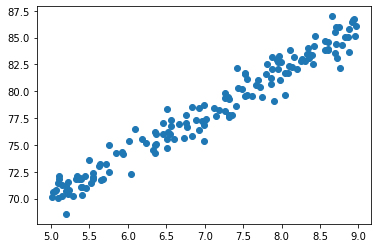

In [58]:
# how we have predicted our model
plt.scatter(X1_train,y1_train)

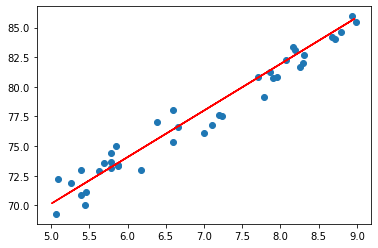

In [59]:
plt.scatter(X1_test,y1_test)
plt.plot(X1_train,lr.predict(X1_train), color = "r")

In [60]:
# we have got accuracy why some blue points are far away from main line i.e 5% error

In [61]:
# now our client is agreed on 95% then we will

Solution present

Save ml model


In [62]:
import joblib  # it saves liner regression model

In [63]:
joblib.dump(lr, "Student_marks_predictor_model.pkl")   #extension of model

['Student_marks_predictor_model.pkl']

In [64]:
#then go to location and download file

In [65]:
model= joblib.load("Student_marks_predictor_model.pkl")# load the model

In [66]:
model.predict([[5]])  # predict with 5 hrs

array([[70.12594512]])

# lunch , monitor and maintain 